In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lượng nhiên liệu tiêu thụ tại Mỹ

Sử dụng mô hình hồi quy tuyến tính để dự báo mức độ tiêu thụ nhiên liệu trong 50 bang của Hoa Kỳ và quận Columbia và tìm hiểu hiệu ứng của tiêu thụ nhiên liệu đối với thuế xăng của các bang.

## Các trường thông tin:
- **Drivers**: Số bằng lái được cấp phép trong bang
- **FuelC**: Lượng xăng sử dụng cho giao thông đường bộ, theo ngàn gallons
- **Income**: Thu nhập bình quân đầu người năm 2000, theo ngàn đôla
- **Miles**: Số dặm đường cao tốc của bang được hỗ trợ từ liên bang
- **Pop**: Dân số lớn hơn hoặc bằng 16 tuổi
- **Tax**: Thuế xăng của bang, theo cents trên một gallon
- **State**: Tên bang

## Các thuộc tính quy đổi trong mô hình:
- **Fuel**: $1000 \times \frac{\text{FuelC}}{\text{Pop}}$
- **Dlic**: $1000 \times \frac{\text{Drivers}}{\text{Pop}}$
- **log(Miles)**: Loga cơ số 2 của Miles

$Fuel = E(X) = \theta_0 + \theta_1Tax + \theta_2Dlic + \theta_3Income + \theta_4logMiles$

In [18]:
data = pd.read_csv('C:/HoangTu/Programing/Python/MachineLearningModelImplement/data/linearregression/fuel.csv')
data.drop(columns='State',inplace=True, axis=1)
data

,Drivers,FuelC,Income,Miles,MPC,Pop,Tax
0,3559897,2382507,23471,94440,12737.00,3451586,18.00
1,472211,235400,30064,13628,7639.16,457728,8.00
2,3550367,2428430,25578,55245,9411.55,3907526,18.00
3,1961883,1358174,22257,98132,11268.40,2072622,21.70
4,21623793,14691753,32275,168771,8923.89,25599275,18.00
5,3287922,2048664,32949,85854,9722.73,3322455,22.00
6,2650374,1458279,40640,20910,9021.35,2651452,25.00
7,564099,382043,31255,5814,10891.30,610269,23.00
8,328094,148769,37383,1534,6555.94,468575,20.00
9,12743403,7471117,28145,117299,9531.23,12741821,13.60


# Mối liên quan giữa điểm GPA SAT

Trong tệp dữ liệu SAT_GPA.csv đính kèm có 84 mẫu dữ liệu điểm thi của các sinh viên, mẫu có 02 trường dữ liệu, trong cột thứ nhất chứa trường điểm SAT (Reading + Mathematic + Writing) của các kỳ thi trong bậc phổ thông; cột thứ hai chứa điểm trung bình GPA của sinh viên tương ứng ở bậc học đại học/cao đẳng. Chúng ta xây dựng một mô hình hồi quy tuyến tính để mô tả sự phụ thuộc của điểm GPA ở bậc đại học/cao đẳng vào điểm SAT của mỗi sinh viên ở bậc phổ thông.

In [19]:
data = pd.read_csv('C:/HoangTu/Programing/Python/MachineLearningModelImplement/data/linearregression/SAT_GPA.csv')
x = data.drop('GPA', axis=1)
y = data['GPA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=26)

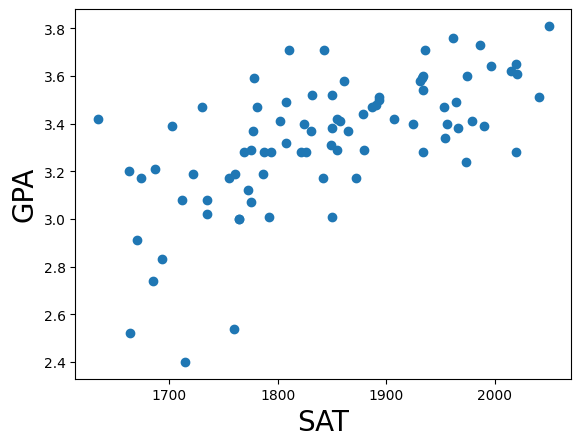

In [20]:
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

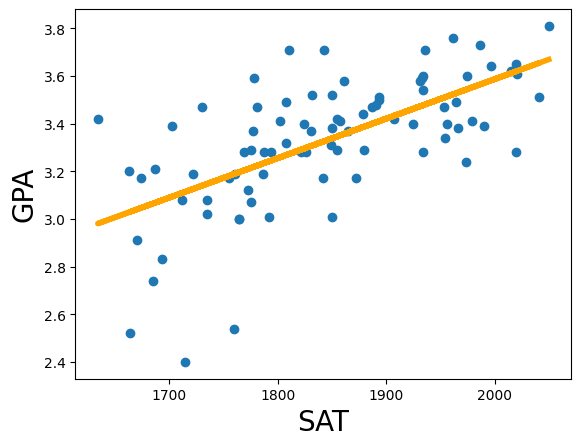

In [21]:
model = LinearRegression()
model.fit(x, y)
t_1 = model.coef_[0]
t_0 = model.intercept_
plt.scatter(x,y)
yhat = t_1 * x + t_0
fig = plt.plot(x,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Dự đoán giá nhà

Trong tệp dữ liệu Real_estate.csv đính kèm chứa thông tin các giao dịch mua bán bất động sản. Chúng ta có 414 mẫu dữ liệu, mỗi bản ghi có 8 cột theo thứ tự là
* Cột No: Số thứ tự (chúng ta sẽ bỏ qua trường này)
* Cột x1: Ngày giao dịch mua bán (ta chỉ lấy phần nguyên là năm)
* Cột x2: Tuổi của căn nhà (theo năm)
* Cột x3: Khoảng cách tới ga MRT (phương tiện công cộng nội đô) gần nhất
* Cột x4: Số cửa hàng tiện ích gần đó
* Cột x5: Kinh độ căn nhà; 
* Cột X6: Vĩ độ căn nhà;
* Cột Y (đầu ra dự báo): Giá của căn nhà

Xây dựng mô hình hồi quy tuyến tính phù hợp với dữ liệu đầu vào. Đưa ra hệ số MSE của mô hình.